In [51]:
import docx
import re
import pandas as pd

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [9]:
df1 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\amy.docx")
df2 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\bill.docx")
df3 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\clara.docx")
df4 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\donna.docx")
df5 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\jack.docx")
df6 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\martha.docx")
df7 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\master.docx")
df8 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\rory.docx")
df9 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\rose.docx")
df10 = getText(r"C:\Users\user\Desktop\пту\нис\text hw\yaz.docx")

In [49]:
df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

In [57]:
def f(data):
    return re.sub(r'[^\w]', ' ', data)
out = pd.Series(df_list).apply(f)

## Task 1

In [88]:
for i in out:
    result = len(i.replace(' s ',' ').split())
    print("There are " + str(result) + " words.")

There are 13924 words.
There are 6973 words.
There are 27880 words.
There are 7652 words.
There are 23007 words.
There are 7334 words.
There are 60815 words.
There are 11656 words.
There are 17484 words.
There are 9888 words.


In [89]:
df = df1 + " " + df2 + " " + df3 + " " + df4 + " " + df5 + " " + df6 + " " + df7 + " " + df8 + " " + df9 + " " + df10

In [90]:
df = re.sub(r'[^\w]', ' ', df)

In [91]:
df = df.replace(' s ',' ')

In [92]:
result = len(df.split())
print("There are " + str(result) + " words in all documents.")

There are 186613 words in all documents.


## Task 2

How many most common words to print: 10

OK. The 10 most common words are as follows

the :  17137
to :  6943
and :  5041
of :  4572
a :  4125
doctor :  3785
in :  2989
was :  2855
her :  2422
he :  2054


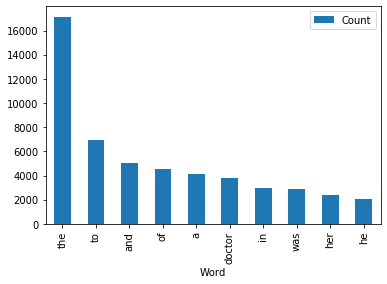

In [93]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline

wordcount = {}

for word in df.lower().split():
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
            
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
lst = word_counter.most_common(n_print)
words = pd.DataFrame(lst, columns = ['Word', 'Count'])
words.plot.bar(x='Word',y='Count')

## Additional statistics

### Average word length

In [107]:
average = sum(len(word) for word in df.split()) / len(df.split())
print('The average word length in dataset is ' + str(round(average,2)))

The average word length in dataset is 4.62


### Number of stopwords

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.  
Full list: https://gist.github.com/sebleier/554280

In [110]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')

st = len([x for x in df.lower().split() if x in stop])
print('The number of stopwords in dataset is ' + str(st))

The number of stopwords in dataset is 83921


### Collocations

In [140]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

filt = [w for w in df.lower().split() if not w in stop]

biagram_collocation = BigramCollocationFinder.from_words(filt)
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

[('time', 'lords'),
 ('sound', 'drums'),
 ('river', 'song'),
 ('time', 'lord'),
 ('vortex', 'manipulator'),
 ('sea', 'devils'),
 ('deep', 'breath'),
 ('sarah', 'jane'),
 ('needs', 'added'),
 ('magician', 'apprentice'),
 ('death', 'heaven'),
 ('twelfth', 'doctor'),
 ('big', 'bang'),
 ('terror', 'autons'),
 ('jack', 'harkness')]

In [135]:
for i in biagram_collocation.score_ngrams(BigramAssocMeasures.likelihood_ratio):
    print (i)

(('time', 'lords'), 1241.0730483536963)
(('sound', 'drums'), 831.0145376385851)
(('river', 'song'), 774.9516873168586)
(('time', 'lord'), 609.4013190475112)
(('vortex', 'manipulator'), 549.9468836047678)
(('sea', 'devils'), 531.7321778307659)
(('deep', 'breath'), 511.14804371018647)
(('sarah', 'jane'), 506.85584267457705)
(('needs', 'added'), 487.6910241716726)
(('magician', 'apprentice'), 474.07167968587027)
(('death', 'heaven'), 458.56881445539307)
(('twelfth', 'doctor'), 411.1716653981422)
(('big', 'bang'), 408.4501925597947)
(('terror', 'autons'), 406.6002735675256)
(('jack', 'harkness'), 400.67825552017786)
(('bad', 'wolf'), 395.8504802966511)
(('21st', 'century'), 395.7109564918276)
(('tenth', 'doctor'), 394.076157714794)
(('eleventh', 'hour'), 392.85143972886675)
(('new', 'york'), 390.5319738994097)
(('bells', 'saint'), 381.7463935060256)
(('amy', 'rory'), 373.342897191312)
(('coal', 'hill'), 368.34240522265907)
(('witch', 'familiar'), 349.25420625692345)
(('doctor', 'falls'), 3

(('wolf', 'pack'), 40.41683822897391)
(('time', 'period'), 40.336900772602085)
(('torchwood', 'india'), 40.294511076249776)
(('first', 'adventure'), 40.29109290324105)
(('would', 'give'), 40.27085434264738)
(('hatred', 'towards'), 40.15543746575512)
(('two', 'days'), 40.15249033317338)
(('girl', 'named'), 40.12799368738301)
(('wc', 'pond'), 40.01366007022955)
(('legacy', 'gallifrey'), 40.00333500067992)
(('ability', 'regenerate'), 39.990130971984144)
(('lumiat', 'lumiat'), 39.982303449571525)
(('daleks', 'manhattan'), 39.96790458553443)
(('doctor', 'companions'), 39.951403806208624)
(('space', 'junk'), 39.91748162685421)
(('birth', 'renegade'), 39.9124248410232)
(('dragon', 'lord'), 39.90068739979674)
(('non', 'interference'), 39.85590278526115)
(('audio', 'month'), 39.76819187745028)
(('audio', 'toy'), 39.76819187745028)
(('eleven', 'incarnations'), 39.74778131115316)
(('callum', 'volta'), 39.74717976718165)
(('jonathan', 'pryce'), 39.74717976718165)
(('uss', 'enterprise'), 39.7471797

(('refused', 'believe'), 25.769508130901144)
(('atmosphere', 'third'), 25.760408387681274)
(('manipulation', 'technology'), 25.760408387681274)
(('trapped', 'many'), 25.73957952938929)
(('intelligence', 'twelfth'), 25.735786185158375)
(('prose', 'liar'), 25.73078562125974)
(('become', 'songs'), 25.704691838226218)
(('joined', 'struggle'), 25.704691838226218)
(('impossible', 'planet'), 25.69496560362235)
(('offered', 'hug'), 25.694300613253432)
(('secret', 'lives'), 25.683175815133623)
(('civil', 'war'), 25.680275613017876)
(('pyramid', 'end'), 25.674285942808226)
(('ashildr', 'viking'), 25.647182852652)
(('would', 'resort'), 25.640540251950828)
(('met', 'doctor'), 25.62693717334107)
(('homevid', 'clara'), 25.61185266713131)
(('dimensional', 'energies'), 25.60751563334891)
(('capable', 'momentarily'), 25.603115992386506)
(('ultimate', 'biological'), 25.599073543652867)
(('25', 'june'), 25.599073543652864)
(('anytime', 'wanted'), 25.581634464050968)
(('answering', 'machine'), 25.56993808

(('professionally', 'sexually'), 22.3063805320587)
(('prowess', 'jeopardised'), 22.3063805320587)
(('psychics', '79'), 22.3063805320587)
(('psychograft', 'implant'), 22.3063805320587)
(('publicly', 'praised'), 22.3063805320587)
(('pulp', 'paperback'), 22.3063805320587)
(('purchasing', 'necessities'), 22.3063805320587)
(('puzzling', 'unexpected'), 22.3063805320587)
(('qualities', 'cherished'), 22.3063805320587)
(('quasar', 'mudslugs'), 22.3063805320587)
(('queer', 'folk'), 22.3063805320587)
(('quietly', 'slipping'), 22.3063805320587)
(('raid', '420'), 22.3063805320587)
(('raped', 'duncan'), 22.3063805320587)
(('reapers', 'outrunning'), 22.3063805320587)
(('reassuring', 'calming'), 22.3063805320587)
(('reconstituted', 'shayde'), 22.3063805320587)
(('reflexive', 'behaviour'), 22.3063805320587)
(('relay', 'transmitting'), 22.3063805320587)
(('religious', 'dictatorship'), 22.3063805320587)
(('reptile', 'zookeeper'), 22.3063805320587)
(('resistant', 'bullets'), 22.3063805320587)
(('retail', 

(('horizon', 'watcher'), 20.074945018916605)
(('humble', 'scholarly'), 20.074945018916605)
(('hungarian', 'bathroom'), 20.074945018916605)
(('hypnotized', 'stoker'), 20.074945018916605)
(('hypothetical', 'gentelman'), 20.074945018916605)
(('identify', 'angered'), 20.074945018916605)
(('imbalance', 'flow'), 20.074945018916605)
(('incapable', 'comedian'), 20.074945018916605)
(('incapable', 'overpowering'), 20.074945018916605)
(('inch', 'tall'), 20.074945018916605)
(('includes', 'images'), 20.074945018916605)
(('incorporated', 'images'), 20.074945018916605)
(('increase', 'rate'), 20.074945018916605)
(('industries', 'battersea'), 20.074945018916605)
(('initiating', 'speed'), 20.074945018916605)
(('inquiry', 'response'), 20.074945018916605)
(('inspector', 'bernstein'), 20.074945018916605)
(('inspector', 'efendi'), 20.074945018916605)
(('internal', 'sensors'), 20.074945018916605)
(('internet', 'spoilers'), 20.074945018916605)
(('intruder', 'willingly'), 20.074945018916605)
(('invalids', 'hea

(('usable', 'ashad'), 18.79999152912391)
(('vagrant', 'streets'), 18.79999152912391)
(('verne', 'example'), 18.79999152912391)
(('victim', 'retrieval'), 18.79999152912391)
(('vinegar', 'chip'), 18.79999152912391)
(('wear', 'eyeliner'), 18.79999152912391)
(('wear', 'heavier'), 18.79999152912391)
(('wear', 'smartsuit'), 18.79999152912391)
(('weird', 'drones'), 18.79999152912391)
(('widowed', 'counterpart'), 18.79999152912391)
(('wreckers', 'piloted'), 18.79999152912391)
(('times', 'places'), 18.799296855801742)
(('involved', 'pair'), 18.79817214102192)
(('imprisoned', 'inside'), 18.792213012430015)
(('around', 'fey'), 18.786607632116993)
(('flight', 'king'), 18.780980711045984)
(('missiles', 'ship'), 18.77885552808103)
(('order', 'avoid'), 18.76616216997221)
(('master', 'allied'), 18.763620423419788)
(('master', 'disguise'), 18.763620423419788)
(('via', 'telepathic'), 18.763605833764597)
(('leadworth', 'dream'), 18.7585400750767)
(('plague', 'humanity'), 18.7585400750767)
(('timeline', '

(('upon', 'leaving'), 17.668869277840862)
(('dominion', 'eyes'), 17.660777321162737)
(('came', 'understand'), 17.65573729660114)
(('possessed', 'body'), 17.653024058660023)
(('take', 'laws'), 17.649273178490677)
(('woman', 'pushed'), 17.637449792137016)
(('materialised', 'around'), 17.63670013709431)
(('help', 'escape'), 17.635937578465846)
(('hospital', 'transported'), 17.634271199437293)
(('eventually', 'wrote'), 17.62458380586543)
(('looked', 'heart'), 17.61673515314278)
(('galactic', 'space'), 17.614633334094314)
(('audio', 'belly'), 17.611690052992135)
(('audio', 'flames'), 17.611690052992135)
(('audio', 'masterpiece'), 17.611690052992135)
(('audio', 'maurice'), 17.611690052992135)
(('audio', 'scaramancer'), 17.611690052992135)
(('end', 'term'), 17.609837245165494)
(('1840', 'pick'), 17.597636175691786)
(('1894', 'wait'), 17.597636175691786)
(('adepts', 'susan'), 17.597636175691786)
(('assists', 'kate'), 17.597636175691786)
(('bank', 'robbers'), 17.597636175691786)
(('beamed', 'wh

(('destruct', 'sequence'), 16.761319945834956)
(('discuss', 'business'), 16.761319945834956)
(('discuss', 'views'), 16.761319945834956)
(('divorce', 'papers'), 16.761319945834956)
(('divorce', 'photo'), 16.761319945834956)
(('duplicated', 'recreated'), 16.761319945834956)
(('earning', 'punch'), 16.761319945834956)
(('earning', 'suspicions'), 16.761319945834956)
(('emotions', 'sin'), 16.761319945834956)
(('eruption', 'mount'), 16.761319945834956)
(('extermination', 'behaving'), 16.761319945834956)
(('feature', 'casting'), 16.761319945834956)
(('feature', 'feared'), 16.761319945834956)
(('fictional', 'recreation'), 16.761319945834956)
(('flame', 'recharge'), 16.761319945834956)
(('flame', 'vulnerable'), 16.761319945834956)
(('focused', 'cowering'), 16.761319945834956)
(('foresaw', 'transducer'), 16.761319945834956)
(('frank', 'shelton'), 16.761319945834956)
(('freezing', 'planes'), 16.761319945834956)
(('fulfilled', 'covertly'), 16.761319945834956)
(('hack', 'pathweb'), 16.76131994583495

(('witnessed', 'firsthand'), 16.243605475948733)
(('refused', 'listen'), 16.24179564852063)
(('considered', 'married'), 16.23848247715089)
(('contact', 'seventh'), 16.23848247715089)
(('century', 'mars'), 16.237629473886823)
(('body', 'reduced'), 16.23668046668272)
(('returned', 'cardiff'), 16.23597794117555)
(('prose', 'good'), 16.231237678058804)
(('attack', 'party'), 16.226449718857083)
(('following', 'first'), 16.221203484831342)
(('apart', 'find'), 16.218662697311252)
(('raggedy', 'man'), 16.217720465862598)
(('companion', 'sam'), 16.21701958701316)
(('inventor', 'incarnation'), 16.21557713240685)
(('male', 'incarnation'), 16.21557713240685)
(('spent', 'days'), 16.214303358829756)
(('watched', 'brief'), 16.214303358829756)
(('field', 'regenerate'), 16.196265784785655)
(('unlike', 'many'), 16.184954751250146)
(('three', 'info'), 16.184719489878763)
(('across', 'bandeirante'), 16.179078153195046)
(('across', 'snowscapes'), 16.179078153195046)
(('agencies', 'across'), 16.179078153195

(('illusion', 'seconds'), 15.518489508450974)
(('immediate', 'reaction'), 15.518489508450974)
(('impending', 'doom'), 15.518489508450974)
(('imperial', 'palace'), 15.518489508450974)
(('inability', 'deduce'), 15.518489508450974)
(('inspiration', 'political'), 15.518489508450974)
(('interplanetary', 'powerful'), 15.518489508450974)
(('interrogated', 'maris'), 15.518489508450974)
(('kaled', 'military'), 15.518489508450974)
(('kingdom', 'beasts'), 15.518489508450974)
(('lack', 'citizens'), 15.518489508450974)
(('laws', 'salyavin'), 15.518489508450974)
(('literal', 'understanding'), 15.518489508450974)
(('lovely', 'singing'), 15.518489508450974)
(('malfunctioning', 'tech'), 15.518489508450974)
(('marcella', 'rome'), 15.518489508450974)
(('marital', 'problems'), 15.518489508450974)
(('martine', 'driven'), 15.518489508450974)
(('merciless', 'sadistic'), 15.518489508450974)
(('messaline', 'remarking'), 15.518489508450974)
(('microwave', 'owned'), 15.518489508450974)
(('mutant', 'radiation'), 

(('constituting', 'story'), 14.840916937851098)
(('copied', 'put'), 14.840916937851098)
(('crossover', 'story'), 14.840916937851098)
(('enacting', 'invasion'), 14.840916937851098)
(('factors', 'led'), 14.840916937851098)
(('hayden', 'believed'), 14.840916937851098)
(('hulk', 'believed'), 14.840916937851098)
(('illustrations', 'story'), 14.840916937851098)
(('invasion', 'dozens'), 14.840916937851098)
(('invasion', 'fascist'), 14.840916937851098)
(('invasion', 'mindmorphs'), 14.840916937851098)
(('invasion', 'scuba'), 14.840916937851098)
(('known', 'conflicts'), 14.840916937851098)
(('known', 'dregs'), 14.840916937851098)
(('known', 'fleshsmiths'), 14.840916937851098)
(('known', 'locally'), 14.840916937851098)
(('known', 'mortimus'), 14.840916937851098)
(('known', 'primords'), 14.840916937851098)
(('known', 'vykoids'), 14.840916937851098)
(('led', 'forego'), 14.840916937851098)
(('led', 'mussafa'), 14.840916937851098)
(('led', 'rekindling'), 14.840916937851098)
(('led', 'ribbons'), 14.84

(('completion', 'yana'), 14.366140876421749)
(('computer', 'technicians'), 14.366140876421749)
(('concrete', 'wall'), 14.366140876421749)
(('containment', 'cell'), 14.366140876421749)
(('decision', 'sport'), 14.366140876421749)
(('destinations', 'included'), 14.366140876421749)
(('difference', 'incident'), 14.366140876421749)
(('drwg', 'incident'), 14.366140876421749)
(('empress', 'targets'), 14.366140876421749)
(('examples', 'included'), 14.366140876421749)
(('fall', 'pharos'), 14.366140876421749)
(('falling', 'lifeless'), 14.366140876421749)
(('frobisher', 'countered'), 14.366140876421749)
(('frobisher', 'melted'), 14.366140876421749)
(('gardezzans', 'retrieve'), 14.366140876421749)
(('harmony', 'culminating'), 14.366140876421749)
(('harmony', 'resided'), 14.366140876421749)
(('incident', 'squid'), 14.366140876421749)
(('included', 'review'), 14.366140876421749)
(('initiate', 'unlike'), 14.366140876421749)
(('instructions', 'exclaiming'), 14.366140876421749)
(('intelligence', 'increa

(('relating', 'number'), 13.912528808480575)
(('relieved', 'hear'), 13.912528808480575)
(('retrieving', 'decaying'), 13.912528808480575)
(('reveal', 'translucent'), 13.912528808480575)
(('rigsy', 'chronolock'), 13.912528808480575)
(('sacrificed', 'reboot'), 13.912528808480575)
(('sacrificed', 'thwart'), 13.912528808480575)
(('sacrificed', 'vain'), 13.912528808480575)
(('seeking', 'examine'), 13.912528808480575)
(('shrunken', 'planets'), 13.912528808480575)
(('site', 'converged'), 13.912528808480575)
(('site', 'flooded'), 13.912528808480575)
(('spouses', '2'), 13.912528808480575)
(('suggested', 'confirm'), 13.912528808480575)
(('switzerland', 'large'), 13.912528808480575)
(('talked', 'committee'), 13.912528808480575)
(('tomb', 'valley'), 13.912528808480575)
(('track', 'renegades'), 13.912528808480575)
(('transducer', 'locked'), 13.912528808480575)
(('translation', 'circuits'), 13.912528808480575)
(('trine', 'grace'), 13.912528808480575)
(('verrier', 'planets'), 13.912528808480575)
(('wi

(('matters', 'angered'), 13.3737299664771)
(('minds', 'spoonhead'), 13.3737299664771)
(('montgomery', 'bus'), 13.3737299664771)
(('mutual', 'promise'), 13.3737299664771)
(('neck', 'resembled'), 13.3737299664771)
(('pharm', 'acting'), 13.3737299664771)
(('pointing', 'accused'), 13.3737299664771)
(('posed', 'inspector'), 13.3737299664771)
(('proclaimed', 'beginning'), 13.3737299664771)
(('proof', 'shop'), 13.3737299664771)
(('prove', 'significant'), 13.3737299664771)
(('quite', 'observant'), 13.3737299664771)
(('quite', 'smart'), 13.3737299664771)
(('relationships', 'hundreds'), 13.3737299664771)
(('relationships', 'produced'), 13.3737299664771)
(('resembled', 'mature'), 13.3737299664771)
(('resembled', 'snake'), 13.3737299664771)
(('restaurant', 'stuart'), 13.3737299664771)
(('reversed', 'flow'), 13.3737299664771)
(('reversed', 'reflection'), 13.3737299664771)
(('scared', 'tired'), 13.3737299664771)
(('schwarz', 'ruins'), 13.3737299664771)
(('seduce', 'succeeded'), 13.3737299664771)
(('

(('run', 'retreating'), 12.9545923092958)
(('run', 'winifred'), 12.9545923092958)
(('saying', 'luxury'), 12.9545923092958)
(('dr', 'john'), 12.94867936199838)
(('alice', 'volatix'), 12.946930321218687)
(('ambrose', 'husband'), 12.946930321218687)
(('assumed', 'magus'), 12.946930321218687)
(('box', 'wherever'), 12.946930321218687)
(('circuit', 'stranding'), 12.946930321218687)
(('cybock', 'play'), 12.946930321218687)
(('davies', 'tradition'), 12.946930321218687)
(('destination', 'galápagos'), 12.946930321218687)
(('elected', 'prime'), 12.946930321218687)
(('forcing', 'litigator'), 12.946930321218687)
(('incapacitated', 'assumed'), 12.946930321218687)
(('isaac', 'disguised'), 12.946930321218687)
(('module', 'disguised'), 12.946930321218687)
(('none', 'selves'), 12.946930321218687)
(('pair', 'reconciled'), 12.946930321218687)
(('performer', 'play'), 12.946930321218687)
(('persona', 'mysterious'), 12.946930321218687)
(('play', 'fields'), 12.946930321218687)
(('rapidly', 'aged'), 12.9469303

(('webstar', 'attack'), 12.585873627128517)
(('rose', 'met'), 12.580901116697216)
(('told', 'latter'), 12.572146451610696)
(('doctor', 'hand'), 12.572133677673408)
(('alternate', 'twelfth'), 12.56839145928546)
(('stating', 'could'), 12.561461247989753)
(('unon', 'could'), 12.561461247989753)
(('destroyed', 'paradox'), 12.561281082407294)
(('masters', 'tremas'), 12.561281082407294)
(('attended', 'jericho'), 12.561269485067118)
(('believe', 'mordred'), 12.561269485067118)
(('believe', 'touching'), 12.561269485067118)
(('convince', 'cybock'), 12.561269485067118)
(('convince', 'kazran'), 12.561269485067118)
(('deserved', 'someone'), 12.561269485067118)
(('hell', 'contradicts'), 12.561269485067118)
(('hell', 'degenerated'), 12.561269485067118)
(('interface', 'moment'), 12.561269485067118)
(('inviting', 'join'), 12.561269485067118)
(('jo', 'hang'), 12.561269485067118)
(('jo', 'uxarieus'), 12.561269485067118)
(('join', 'classified'), 12.561269485067118)
(('leader', 'arunzell'), 12.56126948506

(('church', 'stuart'), 12.135815619518311)
(('claw', 'incident'), 12.135815619518311)
(('computer', 'systems'), 12.135815619518311)
(('disappearing', 'act'), 12.135815619518311)
(('empress', 'augusta'), 12.135815619518311)
(('falling', 'jaska'), 12.135815619518311)
(('fought', 'assassins'), 12.135815619518311)
(('fun', 'speed'), 12.135815619518311)
(('gone', 'lend'), 12.135815619518311)
(('hacking', 'computer'), 12.135815619518311)
(('handle', 'changes'), 12.135815619518311)
(('included', 'portrait'), 12.135815619518311)
(('interests', 'included'), 12.135815619518311)
(('lectures', 'church'), 12.135815619518311)
(('link', 'contestants'), 12.135815619518311)
(('overheard', 'students'), 12.135815619518311)
(('physical', 'helmet'), 12.135815619518311)
(('plotted', 'capture'), 12.135815619518311)
(('previously', 'preferred'), 12.135815619518311)
(('regain', 'physical'), 12.135815619518311)
(('regret', 'decision'), 12.135815619518311)
(('say', 'certain'), 12.135815619518311)
(('searching', 

(('show', 'vanity'), 11.746677432027614)
(('street', 'junior'), 11.746677432027614)
(('sullivan', 'show'), 11.746677432027614)
(('talent', 'show'), 11.746677432027614)
(('tendencies', 'show'), 11.746677432027614)
(('viewing', 'everything'), 11.746677432027614)
(('wastes', 'date'), 11.746677432027614)
(('use', 'telepathic'), 11.743520196187804)
(('calmer', 'well'), 11.740626026409293)
(('coping', 'well'), 11.740626026409293)
(('doctors', 'assemble'), 11.740626026409293)
(('doctors', 'dallas'), 11.740626026409293)
(('doctors', 'surreptitiously'), 11.740626026409293)
(('expressions', 'killing'), 11.740626026409293)
(('governor', 'let'), 11.740626026409293)
(('house', 'brethren'), 11.740626026409293)
(('house', 'closet'), 11.740626026409293)
(('house', 'raffle'), 11.740626026409293)
(('house', 'wolstonecroft'), 11.740626026409293)
(('implicating', 'well'), 11.740626026409293)
(('inherited', 'house'), 11.740626026409293)
(('killing', 'pig'), 11.740626026409293)
(('killing', 'subordinates'),

(('evilness', 'saw'), 11.387778479347825)
(('great', 'capacity'), 11.387778479347825)
(('great', 'courage'), 11.387778479347825)
(('great', 'depths'), 11.387778479347825)
(('great', 'forgiveness'), 11.387778479347825)
(('great', 'hostility'), 11.387778479347825)
(('impersonate', 'john'), 11.387778479347825)
(('john', 'benton'), 11.387778479347825)
(('john', 'bury'), 11.387778479347825)
(('john', 'contents'), 11.387778479347825)
(('john', 'unspecified'), 11.387778479347825)
(('mogellans', 'saw'), 11.387778479347825)
(('perceived', 'great'), 11.387778479347825)
(('player', 'great'), 11.387778479347825)
(('saw', 'ghostly'), 11.387778479347825)
(('veestrax', 'saw'), 11.387778479347825)
(('wrath', 'great'), 11.387778479347825)
(('events', 'angels'), 11.386010319501771)
(('albert', 'explained'), 11.37873910490093)
(('alliances', 'information'), 11.37873910490093)
(('classified', 'information'), 11.37873910490093)
(('conjunction', 'turn'), 11.37873910490093)
(('fact', 'jon'), 11.3787391049009

(('history', '1903'), 11.068239067816007)
(('history', 'cloisters'), 11.068239067816007)
(('history', 'dozen'), 11.068239067816007)
(('history', 'franchise'), 11.068239067816007)
(('programme', 'history'), 11.068239067816007)
(('undetected', 'history'), 11.068239067816007)
(('unmake', 'history'), 11.068239067816007)
(('near', 'end'), 11.065349827238965)
(('travelling', 'tardis'), 11.064485181837222)
(('leaving', 'behind'), 11.064406680866055)
(('master', 'made'), 11.061188514593281)
(('left', 'ring'), 11.057083338071855)
(('behaving', 'much'), 11.056958096241924)
(('claimed', 'buying'), 11.056958096241924)
(('claimed', 'distillation'), 11.056958096241924)
(('directed', 'work'), 11.056958096241924)
(('distracting', 'long'), 11.056958096241924)
(('fight', 'cyclors'), 11.056958096241924)
(('fight', 'ellis'), 11.056958096241924)
(('fight', 'mire'), 11.056958096241924)
(('long', 'carew'), 11.056958096241924)
(('long', 'launched'), 11.056958096241924)
(('much', 'greater'), 11.056958096241924

(('older', 'edward'), 10.739932828792012)
(('rex', 'footage'), 10.739932828792012)
(('silver', 'pendant'), 10.739932828792012)
(('survived', 'retrieved'), 10.739932828792012)
(('telepathically', 'alice'), 10.739932828792012)
(('thrown', 'chaos'), 10.739932828792012)
(('tommy', 'box'), 10.739932828792012)
(('tricked', 'narvin'), 10.739932828792012)
(('tricked', 'sheriff'), 10.739932828792012)
(('tricking', 'alice'), 10.739932828792012)
(('ura', 'tricked'), 10.739932828792012)
(('1967', 'whilst'), 10.739296241929548)
(('exhibit', 'pandorica'), 10.739296241929548)
(('hoarder', 'whilst'), 10.739296241929548)
(('hull', 'force'), 10.739296241929548)
(('needing', 'force'), 10.739296241929548)
(('polarity', 'whilst'), 10.739296241929548)
(('whilst', 'communicating'), 10.739296241929548)
(('master', 'also'), 10.73271443863506)
(('relationship', 'doctor'), 10.729193312811685)
(('trying', 'get'), 10.72860020432722)
(('aboard', 'hasval'), 10.72543596514008)
(('bring', 'redemption'), 10.72543596514

(('empire', 'manipulated'), 10.406524098590955)
(('expedition', 'centre'), 10.406524098590955)
(('gang', 'seemed'), 10.406524098590955)
(('infiltrate', 'facility'), 10.406524098590955)
(('infiltrated', 'facility'), 10.406524098590955)
(('jumped', 'building'), 10.406524098590955)
(('might', 'missed'), 10.406524098590955)
(('mirror', 'alongside'), 10.406524098590955)
(('noted', 'attractive'), 10.406524098590955)
(('noted', 'dean'), 10.406524098590955)
(('noted', 'pretty'), 10.406524098590955)
(('persuaded', 'best'), 10.406524098590955)
(('retained', 'degree'), 10.406524098590955)
(('science', 'getting'), 10.406524098590955)
(('seemed', 'shadow'), 10.406524098590955)
(('system', 'stopping'), 10.406524098590955)
(('events', 'timeline'), 10.405265164026732)
(('krasis', 'use'), 10.404533262746758)
(('makes', 'use'), 10.404533262746758)
(('name', 'deca'), 10.404533262746758)
(('name', 'jax'), 10.404533262746758)
(('name', 'persistently'), 10.404533262746758)
(('name', 'vanessa'), 10.404533262

(('help', 'steer'), 10.055786614644894)
(('help', 'ziggy'), 10.055786614644894)
(('interesting', 'torchwood'), 10.055786614644894)
(('kolstan', 'met'), 10.055786614644894)
(('machinations', 'help'), 10.055786614644894)
(('met', 'conditions'), 10.055786614644894)
(('met', 'countless'), 10.055786614644894)
(('met', 'di'), 10.055786614644894)
(('met', 'emily'), 10.055786614644894)
(('met', 'ernest'), 10.055786614644894)
(('met', 'isley'), 10.055786614644894)
(('met', 'lyric'), 10.055786614644894)
(('met', 'sandeep'), 10.055786614644894)
(('met', 'val'), 10.055786614644894)
(('pagoda', 'help'), 10.055786614644894)
(('probe', 'help'), 10.055786614644894)
(('promoting', 'torchwood'), 10.055786614644894)
(('simulations', 'torchwood'), 10.055786614644894)
(('stairs', 'met'), 10.055786614644894)
(('stenza', 'met'), 10.055786614644894)
(('teammate', 'help'), 10.055786614644894)
(('thals', 'met'), 10.055786614644894)
(('torchwood', 'findings'), 10.055786614644894)
(('torchwood', 'methods'), 10.05

(('1960s', 'jack'), 9.782296050698271)
(('1975', 'jack'), 9.782296050698271)
(('2775', 'jack'), 9.782296050698271)
(('absolution', 'jack'), 9.782296050698271)
(('absolve', 'jack'), 9.782296050698271)
(('ashamed', 'jack'), 9.782296050698271)
(('beeping', 'jack'), 9.782296050698271)
(('burglars', 'jack'), 9.782296050698271)
(('canister', 'jack'), 9.782296050698271)
(('conveyed', 'jack'), 9.782296050698271)
(('demeanor', 'jack'), 9.782296050698271)
(('discourage', 'jack'), 9.782296050698271)
(('earned', 'jack'), 9.782296050698271)
(('erebus', 'jack'), 9.782296050698271)
(('functioned', 'jack'), 9.782296050698271)
(('gravy', 'jack'), 9.782296050698271)
(('ignore', 'jack'), 9.782296050698271)
(('implication', 'jack'), 9.782296050698271)
(('jack', 'alluded'), 9.782296050698271)
(('jack', 'amended'), 9.782296050698271)
(('jack', 'application'), 9.782296050698271)
(('jack', 'awaited'), 9.782296050698271)
(('jack', 'bilis'), 9.782296050698271)
(('jack', 'cleaned'), 9.782296050698271)
(('jack', 

(('thanked', 'gwen'), 9.509811075596703)
(('vague', 'asked'), 9.509811075596703)
(('also', 'took'), 9.508973431009922)
(('unable', 'find'), 9.50812411210975)
(('aftermath', 'adventures'), 9.506052844724424)
(('believing', 'jealousy'), 9.506052844724424)
(('friends', 'villa'), 9.506052844724424)
(('jones', 'fatally'), 9.506052844724424)
(('jones', 'permanent'), 9.506052844724424)
(('kidnapping', 'friends'), 9.506052844724424)
(('message', 'recorded'), 9.506052844724424)
(('message', 'text'), 9.506052844724424)
(('option', 'believing'), 9.506052844724424)
(('painted', 'message'), 9.506052844724424)
(('photograph', 'friends'), 9.506052844724424)
(('secrets', 'friends'), 9.506052844724424)
(('sound', 'departing'), 9.506052844724424)
(('thought', 'entirely'), 9.506052844724424)
(('thought', 'establishing'), 9.506052844724424)
(('wilson', 'thought'), 9.506052844724424)
(('ashad', 'intended'), 9.50465327131938)
(('consequences', 'briefly'), 9.50465327131938)
(('every', 'respect'), 9.504653271

(('mature', 'woman'), 9.208000330227538)
(('porridge', 'said'), 9.208000330227538)
(('said', 'champion'), 9.208000330227536)
(('said', 'coronation'), 9.208000330227536)
(('woman', 'totika'), 9.208000330227536)
(('first', 'regeneration'), 9.207891005148884)
(('apparently', 'half'), 9.207441445918741)
(('cause', 'bonnie'), 9.207441445918741)
(('clear', 'romantic'), 9.207441445918741)
(('cole', 'pick'), 9.207441445918741)
(('confronted', 'surviving'), 9.207441445918741)
(('council', 'general'), 9.207441445918741)
(('developed', 'especially'), 9.207441445918741)
(('ensure', 'destruction'), 9.207441445918741)
(('forever', 'least'), 9.207441445918741)
(('insisted', 'madame'), 9.207441445918741)
(('merlin', 'best'), 9.207441445918741)
(('miracle', 'esther'), 9.207441445918741)
(('months', 'esther'), 9.207441445918741)
(('months', 'relative'), 9.207441445918741)
(('mystery', 'least'), 9.207441445918741)
(('rather', 'remain'), 9.207441445918741)
(('scene', 'lee'), 9.207441445918741)
(('scientis

(('mind', 'leech'), 8.92280939816622)
(('mind', 'managing'), 8.92280939816622)
(('regeneration', 'comfort'), 8.92280939816622)
(('regeneration', 'pointing'), 8.92280939816622)
(('regeneration', 'regardless'), 8.92280939816622)
(('regeneration', 'screaming'), 8.92280939816622)
(('theatre', 'mind'), 8.92280939816622)
(('amy', 'often'), 8.921044457321635)
(('girl', 'blackpool'), 8.920935989979654)
(('girl', 'immediate'), 8.920935989979654)
(('instance', 'girl'), 8.920935989979654)
(('underland', 'saxon'), 8.920935989979654)
(('adam', 'listening'), 8.920527237018009)
(('adam', 'stunned'), 8.920527237018009)
(('admitting', 'working'), 8.920527237018009)
(('crimes', 'order'), 8.920527237018009)
(('johnson', 'adventure'), 8.920527237018009)
(('order', 'defend'), 8.920527237018009)
(('order', 'lure'), 8.920527237018009)
(('photos', 'showed'), 8.920527237018009)
(('showed', 'ruthless'), 8.920527237018009)
(('showed', 'unusual'), 8.920527237018009)
(('threats', 'adventure'), 8.920527237018009)
(

(('lamarius', 'back'), 8.588809569079178)
(('myth', 'back'), 8.588809569079178)
(('regressed', 'back'), 8.588809569079178)
(('repelled', 'back'), 8.588809569079178)
(('retreated', 'back'), 8.588809569079178)
(('transporter', 'back'), 8.588809569079178)
(('audio', 'changes'), 8.588099153389672)
(('detection', 'discovered'), 8.58777562474819)
(('discovered', 'corvids'), 8.58777562474819)
(('discovered', 'guide'), 8.58777562474819)
(('discovered', 'iz'), 8.58777562474819)
(('discovered', 'jewellery'), 8.58777562474819)
(('discovered', 'rock'), 8.58777562474819)
(('serve', 'discovered'), 8.58777562474819)
(('windows', 'discovered'), 8.58777562474819)
(('castrovalva', 'tremas'), 8.586291707168543)
(('married', 'henry'), 8.586291707168543)
(('pretended', 'married'), 8.586291707168543)
(('pretended', 'tremas'), 8.586291707168543)
(('scenes', 'including'), 8.586291707168543)
(('sister', 'third'), 8.586291707168543)
(('suicide', 'dream'), 8.586291707168543)
(('warn', 'third'), 8.586291707168543

(('attention', 'empress'), 8.314099656354134)
(('changes', 'afterwards'), 8.314099656354134)
(('decision', 'afterwards'), 8.314099656354134)
(('giving', 'access'), 8.314099656354134)
(('previously', 'witnessed'), 8.314099656354134)
(('protect', 'queen'), 8.314099656354134)
(('street', 'slitheen'), 8.314099656354134)
(('whose', 'role'), 8.314099656354134)
(('witnessed', 'fall'), 8.314099656354134)
(('witnessed', 'resulting'), 8.314099656354134)
(('aeterna', 'using'), 8.312761457262976)
(('krillitanes', 'using'), 8.312761457262976)
(('market', 'using'), 8.312761457262976)
(('resuscitate', 'using'), 8.312761457262976)
(('using', 'etheric'), 8.312761457262976)
(('using', 'glasses'), 8.312761457262976)
(('using', 'pirate'), 8.312761457262976)
(('using', 'reputation'), 8.312761457262976)
(('using', 'retro'), 8.312761457262976)
(('using', 'talent'), 8.312761457262976)
(('using', 'teleporters'), 8.312761457262976)
(('find', 'clues'), 8.312074567095674)
(('find', 'conquered'), 8.312074567095674

(('mercy', 'imprisoned'), 8.061733068115785)
(('monk', 'hidden'), 8.061733068115785)
(('parallel', 'worlds'), 8.061733068115785)
(('seen', 'keeper'), 8.061733068115785)
(('seen', 'wearing'), 8.061733068115785)
(('special', 'becoming'), 8.061733068115785)
(('trio', 'reunited'), 8.061733068115785)
(('burning', 'without'), 8.060804658886234)
(('individual', 'without'), 8.060804658886234)
(('without', 'consequences'), 8.060804658886234)
(('break', 'realising'), 8.06023221518409)
(('continue', 'remember'), 8.06023221518409)
(('creatures', 'passed'), 8.06023221518409)
(('defeated', 'turning'), 8.06023221518409)
(('judoon', 'learning'), 8.06023221518409)
(('admitted', 'knowing'), 8.060232215184088)
(('admitted', 'yet'), 8.060232215184088)
(('onto', 'dna'), 8.060232215184088)
(('read', 'truth'), 8.060232215184088)
(('alien', 'worm'), 8.056133767506484)
(('apart', 'making'), 8.056133767506484)
(('assured', 'making'), 8.056133767506484)
(('attacked', 'breaking'), 8.056133767506484)
(('attacked',

(('exploded', 'group'), 7.7903204507771155)
(('freedom', 'upon'), 7.7903204507771155)
(('group', 'america'), 7.7903204507771155)
(('masters', 'struck'), 7.7903204507771155)
(('occupied', 'group'), 7.7903204507771155)
(('shock', 'group'), 7.7903204507771155)
(('upon', 'passengers'), 7.7903204507771155)
(('upon', 'setting'), 7.7903204507771155)
(('warehouse', 'group'), 7.7903204507771155)
(('1977', 'however'), 7.789218937946451)
(('amnesia', 'however'), 7.789218937946451)
(('arunzell', 'however'), 7.789218937946451)
(('bombing', 'however'), 7.789218937946451)
(('chat', 'however'), 7.789218937946451)
(('chronology', 'however'), 7.789218937946451)
(('cosmos', 'however'), 7.789218937946451)
(('earp', 'however'), 7.789218937946451)
(('forgave', 'however'), 7.789218937946451)
(('gargoyle', 'however'), 7.789218937946451)
(('however', 'baroness'), 7.789218937946451)
(('however', 'graak'), 7.789218937946451)
(('however', 'initial'), 7.789218937946451)
(('however', 'meteor'), 7.789218937946451)
(

(('occasions', 'real'), 7.413059247769304)
(('real', 'cult'), 7.413059247769304)
(('cwej', 'using'), 7.411335660482662)
(('intention', 'using'), 7.411335660482662)
(('refuel', 'using'), 7.411335660482662)
(('using', 'anomaly'), 7.411335660482662)
(('using', 'explosives'), 7.411335660482662)
(('using', 'magic'), 7.411335660482662)
(('using', 'node'), 7.411335660482662)
(('using', 'souls'), 7.411335660482662)
(('april', 'year'), 7.411072974126658)
(('james', 'upon'), 7.411072974126658)
(('kronos', 'destroyed'), 7.411072974126658)
(('ravenous', 'masters'), 7.411072974126658)
(('skin', 'turned'), 7.411072974126658)
(('therefore', 'destroyed'), 7.411072974126658)
(('turned', 'dragon'), 7.411072974126658)
(('turned', 'ravenous'), 7.411072974126658)
(('umbra', 'group'), 7.411072974126658)
(('unon', 'destroyed'), 7.411072974126658)
(('upon', 'confrontation'), 7.411072974126658)
(('upon', 'ravenous'), 7.411072974126658)
(('claimed', 'whole'), 7.409906930047654)
(('dismemberment', 'fight'), 7.40

(('cybermen', 'emotional'), 7.064959873092786)
(('cybermen', 'remove'), 7.064959873092786)
(('tardis', 'successfully'), 7.0649442270807175)
(('attack', 'demons'), 7.064757474071162)
(('attack', 'mysterious'), 7.064757474071162)
(('autons', 'disguised'), 7.064757474071162)
(('character', 'play'), 7.064757474071162)
(('finally', 'stand'), 7.064757474071162)
(('eminence', 'attack'), 7.064757474071161)
(('fighting', 'autons'), 7.064757474071161)
(('husband', 'hand'), 7.064757474071161)
(('play', 'character'), 7.064757474071161)
(('survived', 'attack'), 7.064757474071161)
(('appearance', 'anthony'), 7.062986023074891)
(('appearance', 'based'), 7.062986023074891)
(('eyes', 'ending'), 7.062986023074891)
(('eyes', 'video'), 7.062986023074891)
(('responsible', 'appearance'), 7.062986023074891)
(('returning', 'dimension'), 7.062986023074891)
(('wave', 'actually'), 7.062986023074891)
(('master', 'found'), 7.062305072845202)
(('eliminator', 'travelled'), 7.0603892081845645)
(('energy', 'putting'),

(('century', 'secretly'), 6.8115538384537215)
(('history', 'altered'), 6.8115538384537215)
(('history', 'changing'), 6.8115538384537215)
(('history', 'england'), 6.8115538384537215)
(('see', 'parents'), 6.811535071296143)
(('sycorax', 'see'), 6.811535071296142)
(('crack', 'let'), 6.811531240099649)
(('doctors', 'longer'), 6.811531240099649)
(('doctors', 'successfully'), 6.811531240099649)
(('hiding', 'house'), 6.811531240099649)
(('members', 'killing'), 6.811531240099649)
(('yvonne', 'let'), 6.811531240099649)
(('evolved', 'human'), 6.808635512983937)
(('hunt', 'human'), 6.808635512983937)
(('leaf', 'human'), 6.808635512983937)
(('companion', 'enter'), 6.808461181315309)
(('oswald', 'born'), 6.807651528283237)
(('roman', 'army'), 6.807651528283236)
(('donna', 'furious'), 6.805597111650168)
(('donna', 'recorded'), 6.805597111650168)
(('donna', 'slipped'), 6.805597111650168)
(('anomaly', 'donna'), 6.805597111650167)
(('aspects', 'donna'), 6.805597111650167)
(('atmos', 'donna'), 6.8055971

(('request', 'return'), 6.57356165957627)
(('scenes', 'face'), 6.57356165957627)
(('account', 'tremas'), 6.5729414857468536)
(('opened', 'younger'), 6.5729414857468536)
(('third', 'floor'), 6.5729414857468536)
(('wore', 'short'), 6.5729414857468536)
(('adult', 'life'), 6.572381651946934)
(('antonia', 'found'), 6.572381651946934)
(('blitz', 'found'), 6.572381651946934)
(('collins', 'life'), 6.572381651946934)
(('coma', 'life'), 6.572381651946934)
(('dating', 'life'), 6.572381651946934)
(('drew', 'life'), 6.572381651946934)
(('forms', 'life'), 6.572381651946934)
(('found', 'byzantium'), 6.572381651946934)
(('found', 'enjoyment'), 6.572381651946934)
(('found', 'entirely'), 6.572381651946934)
(('found', 'mum'), 6.572381651946934)
(('found', 'node'), 6.572381651946934)
(('found', 'photograph'), 6.572381651946934)
(('found', 'reluctant'), 6.572381651946934)
(('found', 'teleportation'), 6.572381651946934)
(('found', 'valeyard'), 6.572381651946934)
(('found', 'zombie'), 6.572381651946934)
(('l

(('rory', 'pond'), 6.256677901406446)
(('memory', 'create'), 6.251755963797864)
(('memory', 'things'), 6.251755963797864)
(('wolf', 'utopia'), 6.251755963797864)
(('autons', 'erased'), 6.25059816178489)
(('great', 'wall'), 6.249921736238277)
(('john', 'frobisher'), 6.249921736238277)
(('timelines', 'john'), 6.249921736238277)
(('earth', 'champion'), 6.247696564557754)
(('earth', 'components'), 6.247696564557754)
(('earth', 'conquered'), 6.247696564557754)
(('earth', 'ease'), 6.247696564557754)
(('earth', 'gridlock'), 6.247696564557754)
(('conquered', 'earth'), 6.247696564557753)
(('reign', 'earth'), 6.247696564557753)
(('skaross', 'earth'), 6.247696564557753)
(('abilities', 'due'), 6.247564774289569)
(('appear', 'children'), 6.247564774289569)
(('appear', 'due'), 6.247564774289569)
(('children', 'investigated'), 6.247564774289569)
(('children', 'spy'), 6.247564774289569)
(('danny', 'hit'), 6.247564774289569)
(('due', 'russell'), 6.247564774289569)
(('fragments', 'children'), 6.24756477

(('dan', 'stop'), 5.901790864502165)
(('enjoyed', 'good'), 5.901790864502165)
(('episode', 'good'), 5.901790864502165)
(('good', 'thinking'), 5.901790864502165)
(('goodbye', 'good'), 5.901790864502165)
(('tower', 'stop'), 5.901790864502165)
(('travelled', 'land'), 5.901790864502165)
(('travelled', 'zygon'), 5.901790864502165)
(('clara', 'broke'), 5.900021455341177)
(('clara', 'confronted'), 5.900021455341177)
(('noted', 'clara'), 5.900021455341177)
(('aftermath', 'missy'), 5.899943764770445)
(('antonia', 'missy'), 5.899943764770445)
(('assistance', 'missy'), 5.899943764770445)
(('consent', 'missy'), 5.899943764770445)
(('missy', 'ill'), 5.899943764770445)
(('missy', 'proposed'), 5.899943764770445)
(('missy', 'reverted'), 5.899943764770445)
(('missy', 'speaking'), 5.899943764770445)
(('seed', 'missy'), 5.899943764770445)
(('sparkles', 'missy'), 5.899943764770445)
(('account', 'showed'), 5.897515161160419)
(('koschei', 'working'), 5.897515161160419)
(('working', 'alone'), 5.8975151611604

(('crack', 'space'), 5.610708596335986)
(('estate', 'future'), 5.610708596335986)
(('future', 'hiding'), 5.610708596335986)
(('future', 'leadworth'), 5.610708596335986)
(('gallifrey', 'warning'), 5.610708596335986)
(('space', 'suit'), 5.610708596335986)
(('die', 'missy'), 5.610569426770763)
(('clara', 'twice'), 5.610420647833722)
(('however', 'alan'), 5.6103136806064375)
(('however', 'failure'), 5.6103136806064375)
(('however', 'sabotaged'), 5.6103136806064375)
(('crystal', 'however'), 5.610313680606437)
(('minutes', 'however'), 5.610313680606437)
(('sato', 'however'), 5.610313680606437)
(('slip', 'however'), 5.610313680606437)
(('teller', 'however'), 5.610313680606437)
(('window', 'however'), 5.610313680606437)
(('eleventh', 'general'), 5.6079493166789565)
(('gave', 'best'), 5.6079493166789565)
(('save', 'similar'), 5.6079493166789565)
(('taken', 'cut'), 5.60739426790981)
(('brian', 'taken'), 5.607394267909809)
(('either', 'taken'), 5.607394267909809)
(('george', 'taken'), 5.607394267

(('enabled', 'two'), 5.280159407054894)
(('takes', 'two'), 5.280159407054894)
(('two', 'minds'), 5.280159407054894)
(('killing', 'clara'), 5.279926923507623)
(('let', 'clara'), 5.279926923507623)
(('truth', 'able'), 5.279128158121448)
(('black', 'president'), 5.2791281581214475)
(('helped', 'pilot'), 5.273622995838648)
(('part', 'deal'), 5.273622995838648)
(('pilot', 'taking'), 5.273622995838648)
(('taking', 'account'), 5.273622995838648)
(('became', 'god'), 5.273003732661259)
(('order', 'finally'), 5.272636081955756)
(('heart', 'twelfth'), 5.272551280421274)
(('moment', 'regeneration'), 5.27249646673826)
(('fought', 'inside'), 5.272266844301045)
(('retrieve', 'inside'), 5.272266844301045)
(('inside', 'professor'), 5.272266844301044)
(('discover', 'torchwood'), 5.271084286907625)
(('met', '2009'), 5.271084286907625)
(('met', 'davros'), 5.271084286907625)
(('torchwood', 'contained'), 5.271084286907625)
(('word', 'torchwood'), 5.271084286907625)
(('never', 'developed'), 5.27101657451372)

(('due', 'brief'), 4.978614014240057)
(('lumiat', 'due'), 4.978614014240057)
(('never', 'happened'), 4.977328579005231)
(('never', 'really'), 4.977328579005231)
(('present', 'past'), 4.977328579005231)
(('visit', 'past'), 4.977328579005231)
(('hospital', 'rose'), 4.977178004843685)
(('rose', 'quickly'), 4.977178004843685)
(('mickey', 'accidentally'), 4.973915835161588)
(('saw', 'owen'), 4.972078426019378)
(('amelia', 'saw'), 4.972078426019377)
(('sent', 'fourth'), 4.970404083333585)
(('kept', 'game'), 4.970363446532812)
(('find', 'cause'), 4.970347894559011)
(('ship', 'holding'), 4.969802765626314)
(('ship', 'security'), 4.969802765626314)
(('dead', 'shortly'), 4.969370834527481)
(('die', 'come'), 4.969170702978079)
(('give', 'army'), 4.969170702978079)
(('tyler', 'wedding'), 4.969170702978079)
(('angel', 'realised'), 4.9676428239502695)
(('convinced', 'something'), 4.9676428239502695)
(('forced', 'meet'), 4.9676428239502695)
(('tardis', 'control'), 4.966807358079574)
(('said', 'auton'

(('arriving', 'day'), 4.614635722245312)
(('day', 'learn'), 4.614635722245312)
(('brought', 'captain'), 4.614209690639104)
(('master', 'arrival'), 4.613550282758887)
(('master', 'awoke'), 4.613550282758887)
(('master', 'capable'), 4.613550282758887)
(('recognised', 'master'), 4.613550282758886)
(('army', 'audio'), 4.612539657558135)
(('aliens', 'despite'), 4.612176077072168)
(('danny', 'ordered'), 4.612176077072168)
(('despite', 'living'), 4.612176077072168)
(('due', 'living'), 4.612176077072168)
(('escaped', 'pete'), 4.612176077072168)
(('escaped', 'stopped'), 4.612176077072168)
(('process', 'due'), 4.612176077072168)
(('father', 'early'), 4.610049511142395)
(('father', 'kept'), 4.610049511142395)
(('given', 'kept'), 4.610049511142395)
(('visited', 'many'), 4.610049511142395)
(('never', 'regenerate'), 4.608401442843236)
(('called', 'bad'), 4.608117078335842)
(('friends', 'prose'), 4.607897410805625)
(('go', 'looking'), 4.6070697368912805)
(('started', 'go'), 4.6070697368912805)
(('abl

(('osgood', 'audio'), 4.292169013227879)
(('thane', 'audio'), 4.292169013227879)
(('century', 'device'), 4.29205630785383)
(('keep', 'history'), 4.29205630785383)
(('body', 'retained'), 4.291534301030291)
(('system', 'body'), 4.291534301030291)
(('next', 'captured'), 4.29069955904901)
(('together', 'captured'), 4.29069955904901)
(('version', 'dark'), 4.29069955904901)
(('creatures', 'universe'), 4.289146613099793)
(('fourth', 'universe'), 4.289146613099793)
(('president', 'universe'), 4.289146613099793)
(('however', 'despite'), 4.28872728492027)
(('however', 'due'), 4.28872728492027)
(('children', 'however'), 4.2887272849202684)
(('danny', 'however'), 4.2887272849202684)
(('away', 'dream'), 4.288288801706006)
(('away', 'humanity'), 4.288288801706006)
(('forced', 'travel'), 4.288007023462148)
(('forced', 'work'), 4.288007023462148)
(('leaving', 'fight'), 4.288007023462148)
(('lives', 'memories'), 4.287957690688176)
(('final', 'part'), 4.287792461701508)
(('part', 'meeting'), 4.287792461

(('put', 'good'), 3.9582620596262528)
(('put', 'stop'), 3.9582620596262528)
(('even', 'planned'), 3.9559668752284978)
(('learned', 'river'), 3.9559668752284978)
(('phone', 'even'), 3.9559668752284978)
(('said', 'one'), 3.955812589016197)
(('change', 'last'), 3.955639388070327)
(('killed', 'change'), 3.955639388070327)
(('last', 'king'), 3.955639388070327)
(('brought', 'place'), 3.9548433414047017)
(('place', 'child'), 3.9548433414047017)
(('knew', 'creature'), 3.954663329220972)
(('knew', 'others'), 3.954663329220972)
(('people', 'lives'), 3.9530274859320835)
(('bald', 'war'), 3.9506225744603887)
(('horror', 'new'), 3.9506225744603887)
(('working', 'london'), 3.950011037602954)
(('finding', 'ship'), 3.9495656567219295)
(('safety', 'ship'), 3.9495656567219295)
(('ship', 'subsequently'), 3.9495656567219295)
(('home', 'whilst'), 3.9494390333090568)
(('whilst', 'home'), 3.949439033309056)
(('audio', 'place'), 3.9492992935750553)
(('appearance', 'history'), 3.9487882130503325)
(('said', 'en

(('moment', 'left'), 3.6081606631820295)
(('really', 'left'), 3.6081606631820295)
(('left', 'believe'), 3.608160663182029)
(('left', 'legacy'), 3.608160663182029)
(('2008', 'rory'), 3.6075634339700837)
(('nurse', 'rory'), 3.6075634339700837)
(('unconscious', 'rory'), 3.6075634339700837)
(('rory', 'arthur'), 3.6075634339700833)
(('rory', 'committed'), 3.6075634339700833)
(('woman', 'along'), 3.6070009948682102)
(('people', 'thought'), 3.606651059317554)
(('save', 'dark'), 3.605856228227005)
(('adventure', 'past'), 3.605092344499253)
(('never', 'showed'), 3.605092344499253)
(('past', 'adventure'), 3.605092344499253)
(('took', 'break'), 3.604645739792919)
(('virus', 'took'), 3.604645739792919)
(('taken', 'city'), 3.604610568934626)
(('masters', 'group'), 3.604464551444563)
(('already', 'went'), 3.6043421491122594)
(('found', 'adopted'), 3.603305379565932)
(('life', 'remained'), 3.603305379565932)
(('passed', 'life'), 3.603305379565932)
(('history', 'encountered'), 3.6027416317351255)
(('a

(('realised', 'although'), 3.242542411849038)
(('set', 'power'), 3.242174405480979)
(('set', 'return'), 3.242174405480979)
(('real', 'jack'), 3.2417852237204996)
(('day', 'hospital'), 3.240800427827421)
(('decided', 'companions'), 3.240505794810061)
(('abandoned', 'earth'), 3.240196542541808)
(('earth', 'arriving'), 3.240196542541808)
(('earth', 'repair'), 3.240196542541808)
(('earth', 'stranded'), 3.240196542541808)
(('earth', 'transported'), 3.240196542541808)
(('2', 'rose'), 3.239757094258631)
(('2020', 'rose'), 3.239757094258631)
(('crucible', 'rose'), 3.239757094258631)
(('nightmare', 'rose'), 3.239757094258631)
(('revived', 'rose'), 3.239757094258631)
(('rose', 'befriended'), 3.239757094258631)
(('rose', 'confused'), 3.239757094258631)
(('rose', 'exposed'), 3.239757094258631)
(('rose', 'flew'), 3.239757094258631)
(('rose', 'locked'), 3.239757094258631)
(('rose', 'mobile'), 3.239757094258631)
(('rose', 'nightmare'), 3.239757094258631)
(('rose', 'pointed'), 3.239757094258631)
(('ro

(('lords', 'claimed'), 2.915619215567983)
(('lords', 'long'), 2.915619215567983)
(('lords', 'much'), 2.915619215567983)
(('told', 'head'), 2.915520773340341)
(('humanity', 'left'), 2.9153533289397924)
(('left', 'journey'), 2.9153533289397924)
(('married', 'left'), 2.9153533289397924)
(('evil', 'time'), 2.915210922985451)
(('time', 'living'), 2.915210922985451)
(('time', 'rest'), 2.915210922985451)
(('instead', 'although'), 2.9151568915759762)
(('time', 'coordinates'), 2.9145951628189275)
(('time', 'evening'), 2.9145951628189275)
(('time', 'experiments'), 2.9145951628189275)
(('time', 'frightened'), 2.9145951628189275)
(('time', 'glory'), 2.9145951628189275)
(('time', 'wrote'), 2.9145951628189275)
(('affected', 'time'), 2.9145951628189266)
(('consumed', 'time'), 2.9145951628189266)
(('crush', 'time'), 2.9145951628189266)
(('example', 'time'), 2.9145951628189266)
(('feeding', 'time'), 2.9145951628189266)
(('frightened', 'time'), 2.9145951628189266)
(('hunt', 'time'), 2.9145951628189266)


(('crew', 'however'), 2.480250167804904)
(('field', 'however'), 2.480250167804904)
(('day', 'tv'), 2.4793155870560772)
(('world', 'girl'), 2.4790120175423453)
(('saw', 'inside'), 2.478115778810963)
(('mickey', 'though'), 2.4775245612083445)
(('planet', 'refused'), 2.4766879432308455)
(('time', 'prose'), 2.476270832237148)
(('river', 'vortex'), 2.4753427678784066)
(('later', 'released'), 2.475076710164024)
(('adventures', 'told'), 2.4749471830415812)
(('told', 'friends'), 2.4749471830415812)
(('came', 'future'), 2.474931985340638)
(('something', 'made'), 2.4739774480124854)
(('set', 'ship'), 2.4713500470404774)
(('ship', 'set'), 2.4713500470404774)
(('work', 'yaz'), 2.4712632939476125)
(('yaz', 'claimed'), 2.471263293947612)
(('yaz', 'fight'), 2.471263293947612)
(('different', 'one'), 2.471165537733137)
(('one', 'agency'), 2.471165537733137)
(('one', 'wc'), 2.471165537733137)
(('found', 'attack'), 2.470694227894641)
(('life', 'started'), 2.470694227894641)
(('source', 'also'), 2.4703541

(('clara', 'whether'), 2.0083527144679603)
(('cycle', 'clara'), 2.0083527144679603)
(('games', 'clara'), 2.0083527144679603)
(('invited', 'clara'), 2.0083527144679603)
(('bill', 'leave'), 2.007177070116651)
(('bill', 'next'), 2.007177070116651)
(('bill', 'version'), 2.007177070116651)
(('name', 'return'), 2.0066756157150953)
(('use', 'tried'), 2.0066756157150953)
(('incarnation', 'twelfth'), 2.0064706400966656)
(('tardis', 'appeared'), 2.0063803701715406)
(('returned', 'companions'), 2.006075434349021)
(('two', 'soon'), 2.0057571885785617)
(('bill', 'later'), 2.004271906724917)
(('later', 'bill'), 2.004271906724917)
(('daleks', 'attempted'), 2.0041158362367586)
(('daleks', 'making'), 2.0041158362367586)
(('events', 'daleks'), 2.0041158362367586)
(('river', 'eventually'), 2.0014878569175525)
(('years', 'mother'), 2.001444129808105)
(('child', 'jack'), 2.001407207497137)
(('jack', 'helped'), 2.001407207497137)
(('jack', 'taking'), 2.001407207497137)
(('help', 'children'), 2.0005353621989

(('death', 'leaving'), 1.5464227555927461)
(('night', 'death'), 1.5464227555927461)
(('away', 'dalek'), 1.5464205911007316)
(('still', 'killed'), 1.5462312785238914)
(('end', 'return'), 1.5460674875232112)
(('face', 'end'), 1.5460674875232112)
(('told', 'team'), 1.5454466898347332)
(('destroyed', 'two'), 1.545261729942608)
(('see', 'new'), 1.5449112871668376)
(('school', 'martha'), 1.5433793784490955)
(('incarnation', 'past'), 1.5431538724494027)
(('blue', 'tardis'), 1.5413369684179707)
(('placed', 'tardis'), 1.5413369684179707)
(('steal', 'tardis'), 1.5413369684179707)
(('tardis', 'continue'), 1.5413369684179707)
(('tardis', 'placed'), 1.5413369684179707)
(('tardis', 'steal'), 1.5413369684179707)
(('tardis', 'virus'), 1.5413369684179707)
(('tardis', 'yet'), 1.5413369684179707)
(('amy', 'learned'), 1.5410637225356731)
(('amy', 'run'), 1.5410637225356731)
(('choice', 'amy'), 1.5410637225356731)
(('learned', 'amy'), 1.5410637225356731)
(('phone', 'amy'), 1.5410637225356731)
(('jack', 'ga

(('called', 'bill'), 1.0743662197153943)
(('companions', 'comic'), 1.0740588433010543)
(('name', 'told'), 1.0735215221522652)
(('missy', 'bill'), 1.073170330678344)
(('away', 'two'), 1.072418891922875)
(('universe', 'met'), 1.0715234234737037)
(('master', 'believing'), 1.0708881603290323)
(('clara', 'never'), 1.0701543118036145)
(('also', 'said'), 1.0687223015466323)
(('capture', 'master'), 1.0685485207331609)
(('empress', 'master'), 1.0685485207331609)
(('fall', 'master'), 1.0685485207331609)
(('incident', 'master'), 1.0685485207331609)
(('master', 'changes'), 1.0685485207331609)
(('master', 'decision'), 1.0685485207331609)
(('master', 'fall'), 1.0685485207331609)
(('master', 'falling'), 1.0685485207331609)
(('master', 'physical'), 1.0685485207331609)
(('master', 'professor'), 1.0685485207331609)
(('master', 'spoke'), 1.0685485207331609)
(('master', 'whose'), 1.0685485207331609)
(('mentioned', 'master'), 1.0685485207331609)
(('retrieve', 'master'), 1.0685485207331609)
(('say', 'master

(('day', 'new'), 0.5353226506648889)
(('day', 'war'), 0.5353226506648889)
(('better', 'master'), 0.5352313707559417)
(('influence', 'master'), 0.5352313707559417)
(('master', 'bruce'), 0.5352313707559417)
(('master', 'converted'), 0.5352313707559417)
(('master', 'sky'), 0.5352313707559417)
(('master', 'telepathic'), 0.5352313707559417)
(('children', 'prose'), 0.5351994908640687)
(('one', 'past'), 0.5351297526662022)
(('die', 'clara'), 0.5346713928695714)
(('made', 'first'), 0.53281890121742)
(('found', 'returned'), 0.5323213281228212)
(('returned', 'life'), 0.5323213281228212)
(('planet', 'amy'), 0.5317374526226026)
(('lords', 'death'), 0.5306635399526345)
(('control', 'master'), 0.5306473739846882)
(('clara', 'discovered'), 0.5293647964961457)
(('child', 'rose'), 0.5281149784757333)
(('rose', 'brought'), 0.5281149784757333)
(('rose', 'taking'), 0.5281149784757333)
(('bring', 'time'), 0.5278157894160567)
(('choice', 'time'), 0.5278157894160567)
(('crew', 'time'), 0.5278157894160567)
((

(('one', 'body'), 0.09506615810435481)
(('tardis', 'clara'), 0.09470277586258158)
(('war', 'could'), 0.09308709560342465)
(('one', 'also'), 0.09305888883611513)
(('tardis', 'help'), 0.09277425907081771)
(('tardis', 'met'), 0.09277425907081771)
(('man', 'time'), 0.09257281719633415)
(('future', 'rose'), 0.09249251753871413)
(('gallifrey', 'rose'), 0.09249251753871413)
(('rose', 'future'), 0.09249251753871413)
(('rose', 'new'), 0.09244543980196696)
(('one', 'incarnation'), 0.09214735467625068)
(('master', 'timeline'), 0.09187624391553773)
(('master', 'travelling'), 0.09187624391553773)
(('travelling', 'master'), 0.09187624391553773)
(('colony', 'tv'), 0.09174124795178884)
(('ended', 'tv'), 0.09174124795178884)
(('needed', 'tv'), 0.09174124795178884)
(('race', 'tv'), 0.09174124795178884)
(('hub', 'doctor'), 0.09120088550238215)
(('shortly', 'doctor'), 0.09120088550238215)
(('london', 'clara'), 0.0910549245418315)
(('made', 'prose'), 0.09091328821646905)
(('prose', 'made'), 0.0909132882164

## Visualizations

In [136]:
#pip install wordcloud matplotlib

In [115]:
from wordcloud import WordCloud

In [117]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = stop).generate(df)

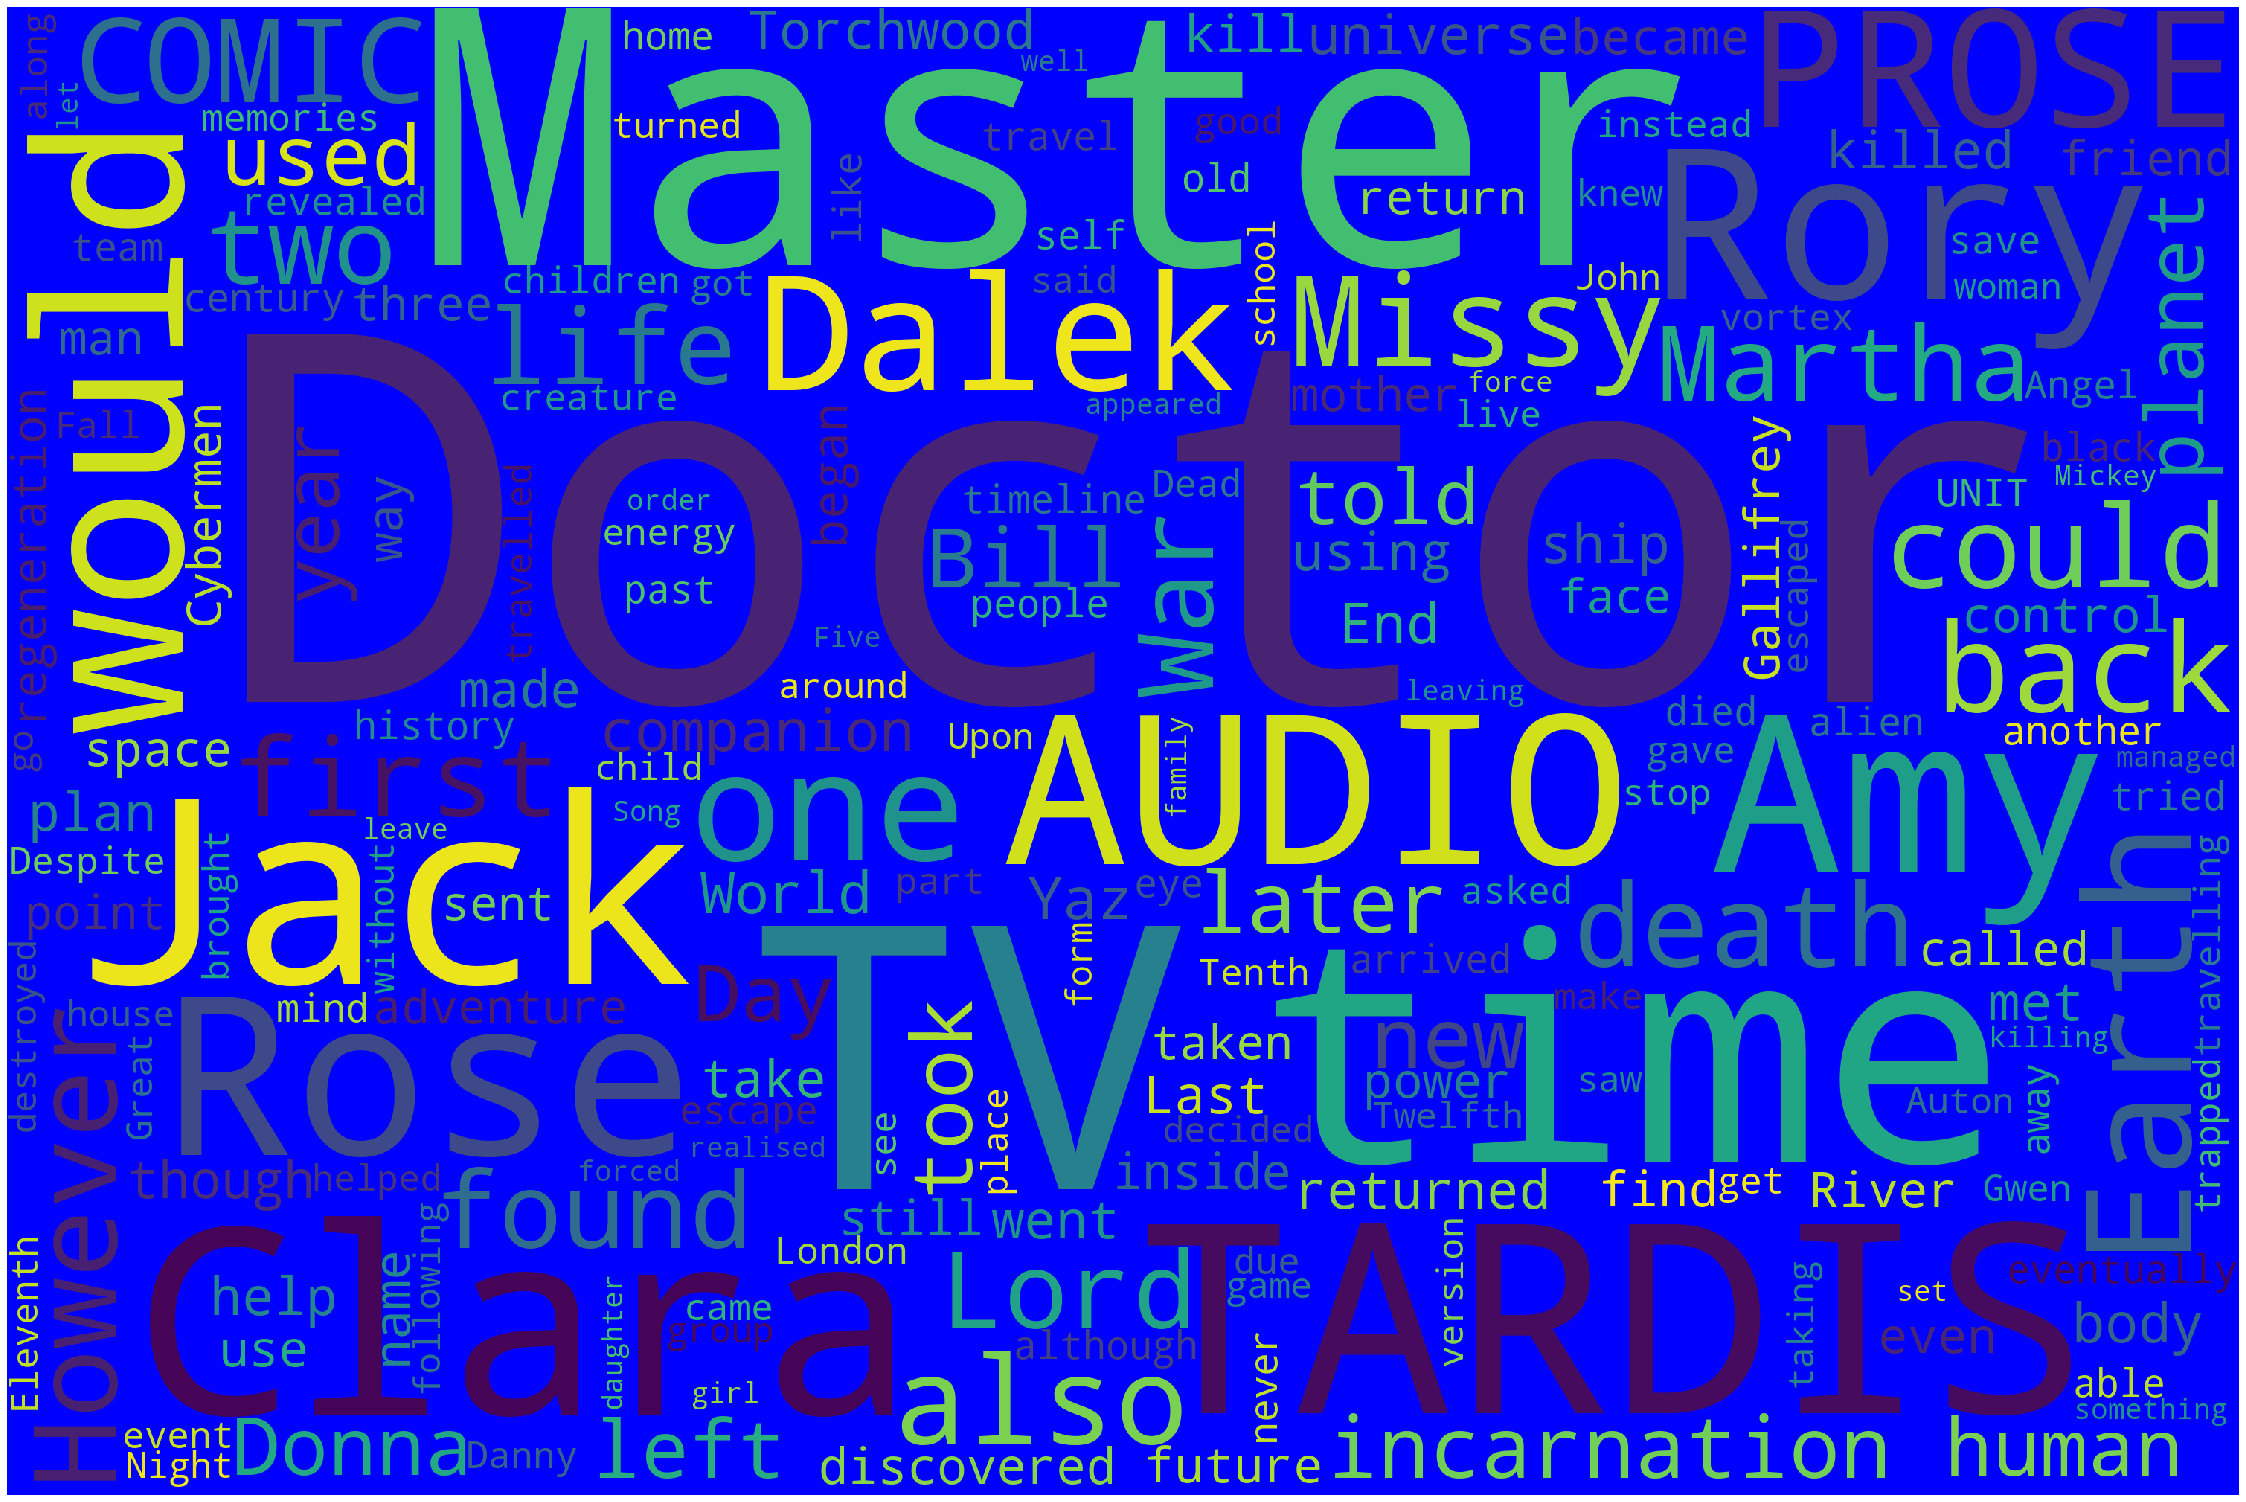

In [118]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()